## **Smoking Drinking Prediction**

**Problem Statement:**  
The goal is to predict smoking and drinking habits based on various health and demographic attributes provided in the dataset. This involves analyzing the relationships between features such as age, gender, physical measurements, and health indicators to determine patterns and build a predictive model for smoking and drinking behavior.

Often when patients are diagnosed with a respiratory problem or health condition, they are reluctant to reveal information regarding their smoking and drinking status, that is, whether they smoke or drink and if so, how frequently. There may be several reasons ranging from fear of dismissal or appearing as someone who is careless about personal health. In any case, this leads to misinformation and difficulty for medical practitioners in providing proper treatment. Therefore, there is a need for accurate knowledge of a patient’s smoking and drinking status without having to rely on the patient’s words for the same. It has been shown that this very information can be predicted based on several measurable body signals such as Blood Pressure, Cholesterol, Urine Proteins, and a few enzymes.

**Smoking Drinking Dataset -->**

#### **Importing Dependencies**

In [43]:
# Libraries: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## **Data Collection & Data Analysis**

In [44]:
dataset = pd.read_csv('smoking_drinking_dataset.csv')

In [45]:
dataset.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,80,99,193,48,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,87,95,201,76,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,82,101,199,61,117,104,13.8,1,0.8,19,12,25,1,N


In [46]:
dataset.shape

(49999, 24)

In [47]:
dataset.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP             int64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object

#### **Rename Columns for Clarity**

In [48]:
dataset.rename(columns={
    'sex': 'gender',
    'waistline': 'waist_cm',
    'height': 'height_cm',
    'weight': 'weight_kg',
    'sight_left': 'vision_left',
    'sight_right': 'vision_right',
    'SBP': 'systolic_bp',
    'DBP': 'diastolic_bp',
    'BLDS': 'blood_sugar',
    'tot_chole': 'total_cholesterol',
    'HDL_chole': 'hdl_cholesterol',
    'LDL_chole': 'ldl_cholesterol',
    'triglyceride': 'triglycerides',
    'Urine_protein': 'urine_protein',
    'serum_creatinine': 'creatinine',
    'AST': 'liver_ast',
    'ALT': 'liver_alt',
    'gamma_GTP': 'gamma_gtp',
    'SMK_stat_type_cd': 'smoking_status',
    'DRK_YN': 'is_drinker'
}, inplace=True)

In [49]:
dataset.head(3)

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,80,99,193,48,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68,1,N


#### **Checking Null Values**

In [50]:
print("Missing values:\n", dataset.isnull().sum())

Missing values:
 gender               0
age                  0
height_cm            0
weight_kg            0
waist_cm             0
vision_left          0
vision_right         0
hear_left            0
hear_right           0
systolic_bp          0
diastolic_bp         0
blood_sugar          0
total_cholesterol    0
hdl_cholesterol      0
ldl_cholesterol      0
triglycerides        0
hemoglobin           0
urine_protein        0
creatinine           0
SGOT_AST             0
SGOT_ALT             0
gamma_gtp            0
smoking_status       0
is_drinker           0
dtype: int64


#### **Checking Duplicated Values**

In [51]:
dataset[dataset.duplicated()]

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker


### **Visualizing the Data**

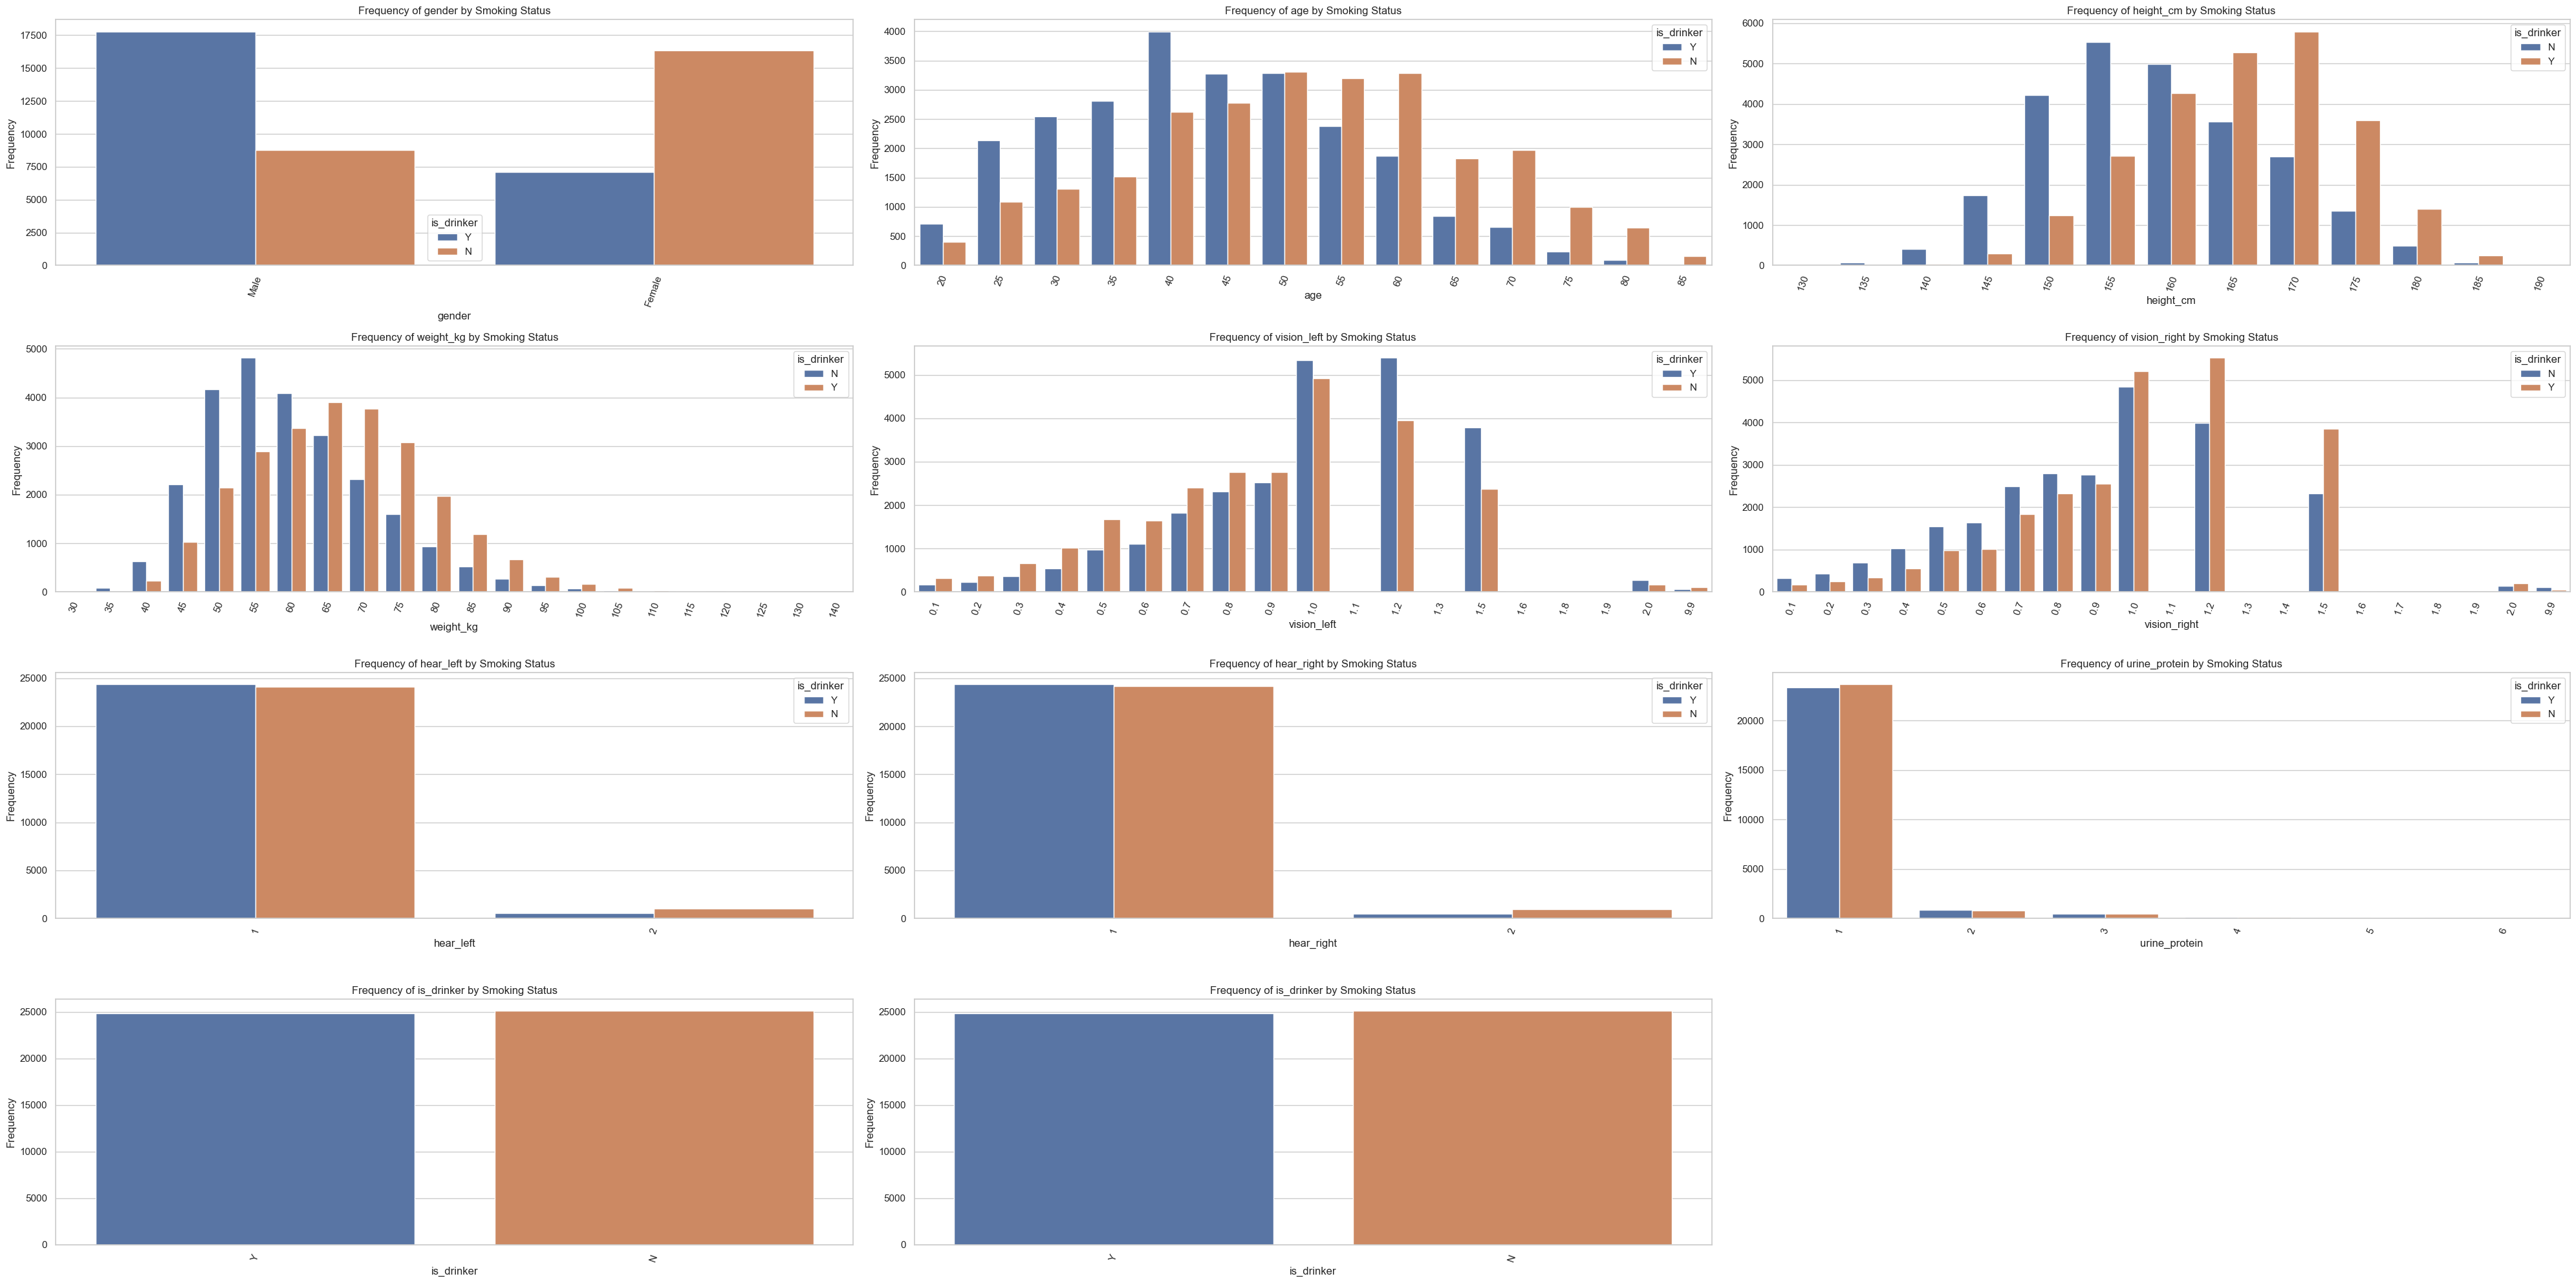

In [52]:
# current_y_is_smoking_or_drinking = 'smoking_status'
currently_is_smoking_or_drinking = 'is_drinker'

sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))

for idx, column in enumerate(['gender', 'age', 'height_cm', 'weight_kg', 'vision_left', 'vision_right', 'hear_left', 'hear_right',
                              "urine_protein", currently_is_smoking_or_drinking, "is_drinker"], start=1):

    plt.subplot(4, 3, idx)

    sns.countplot(x=column, data=dataset , hue=currently_is_smoking_or_drinking)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')

plt.tight_layout()
plt.show()

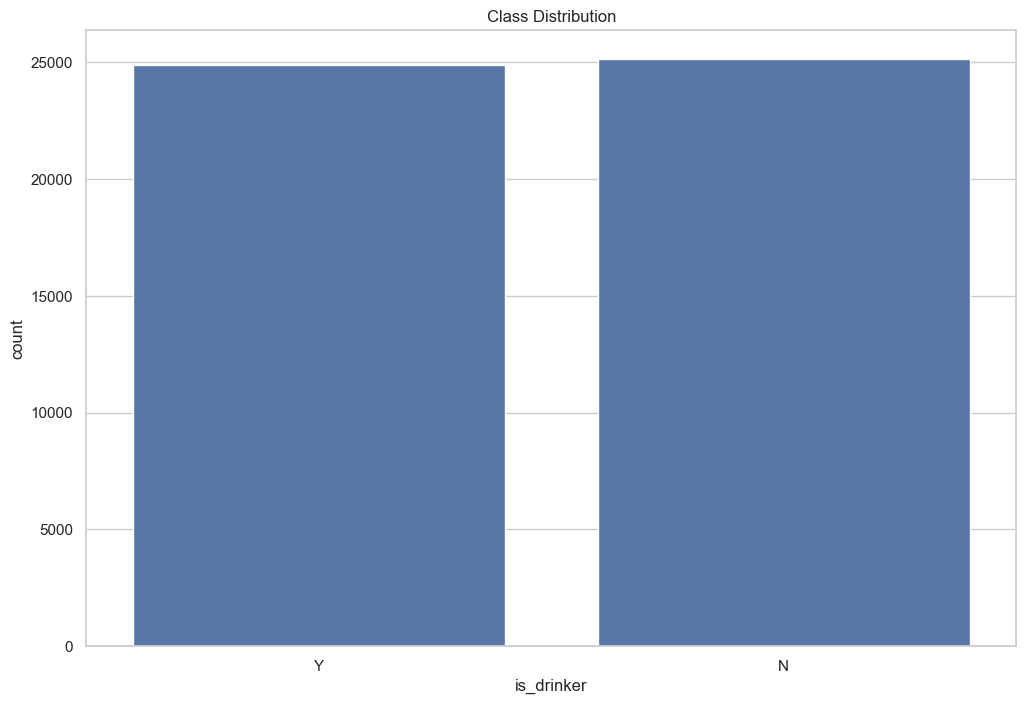

In [53]:
plt.figure(figsize=(12,8))
sns.countplot(x='is_drinker', data=dataset)
plt.title('Class Distribution')
plt.show()

#### **Removing Ineffective Columns**

In [54]:
dataset.groupby('smoking_status').mean(numeric_only=True)

,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp
smoking_status,,,,,,,,,,,,,,,,,,,,,
1,48.364920,158.535258,59.235133,78.949510,0.950225,0.941546,1.030595,1.030727,121.142985,74.912582,98.552061,195.616392,59.573560,113.803069,114.709202,13.634031,1.089568,0.802269,24.700139,22.898624,27.356221
2,50.159311,167.304661,69.228777,85.218858,1.022551,1.022731,1.041207,1.036478,125.350034,78.059896,104.034114,194.606958,53.839563,112.584440,147.149741,14.959029,1.114163,0.964524,28.111124,29.840126,46.071043
3,43.303777,168.425985,69.532298,84.273913,1.041376,1.052899,1.022512,1.020123,123.606267,77.589360,103.119085,196.559313,52.822384,112.028393,168.585133,15.277773,1.103005,0.934513,27.566204,30.191308,55.308738


In [55]:
dataset.drop(['hear_left', 'hear_right', 'urine_protein'], axis=1, inplace=True)

#### **Feature Transformation**

In [56]:
# Creating BMI feature
dataset['BMI'] = dataset['weight_kg'] / ((dataset['height_cm']/100) ** 2)

In [57]:
dataset.head()

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker,BMI
0,Male,35,170,75,90.0,1.0,1.0,120,80,99,193,48,126,92,17.1,1.0,21,35,40,1,Y,25.951557
1,Male,30,180,80,89.0,0.9,1.2,130,82,106,228,55,148,121,15.8,0.9,20,36,27,3,N,24.691358
2,Male,40,165,75,91.0,1.2,1.5,120,70,98,136,41,74,104,15.8,0.9,47,32,68,1,N,27.548209
3,Male,50,175,80,91.0,1.5,1.2,145,87,95,201,76,104,106,17.6,1.1,29,34,18,1,N,26.122449
4,Male,50,165,60,80.0,1.0,1.2,138,82,101,199,61,117,104,13.8,0.8,19,12,25,1,N,22.038567


#### **Labelled Encoding**

In [58]:
label = LabelEncoder()

In [59]:
dataset['gender'] = label.fit_transform(dataset.gender) # Male - 1, Female - 2

In [60]:
dataset['is_drinker'] = label.fit_transform(dataset.is_drinker) # Yes - 1, No - 0

In [61]:
dataset.head()

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker,BMI
0,1,35,170,75,90.0,1.0,1.0,120,80,99,193,48,126,92,17.1,1.0,21,35,40,1,1,25.951557
1,1,30,180,80,89.0,0.9,1.2,130,82,106,228,55,148,121,15.8,0.9,20,36,27,3,0,24.691358
2,1,40,165,75,91.0,1.2,1.5,120,70,98,136,41,74,104,15.8,0.9,47,32,68,1,0,27.548209
3,1,50,175,80,91.0,1.5,1.2,145,87,95,201,76,104,106,17.6,1.1,29,34,18,1,0,26.122449
4,1,50,165,60,80.0,1.0,1.2,138,82,101,199,61,117,104,13.8,0.8,19,12,25,1,0,22.038567


### **Outlier Treatment**

In [62]:
numerical_columns = ['gender', 'age', 'height_cm', 'weight_kg', 'waist_cm', 'vision_left', 'vision_right',
                 'systolic_bp', 'diastolic_bp', 'blood_sugar', 'total_cholesterol', 'hdl_cholesterol', 'ldl_cholesterol',
                 'triglycerides', 'hemoglobin', 'creatinine', 'SGOT_AST',
                 'SGOT_ALT', 'gamma_gtp']

In [63]:
original_data = dataset.copy() 

In [64]:
# Apply IQR-based clipping to numerical columns
for col in numerical_columns:
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    dataset[col] = dataset[col].clip(lower=lower, upper=upper)

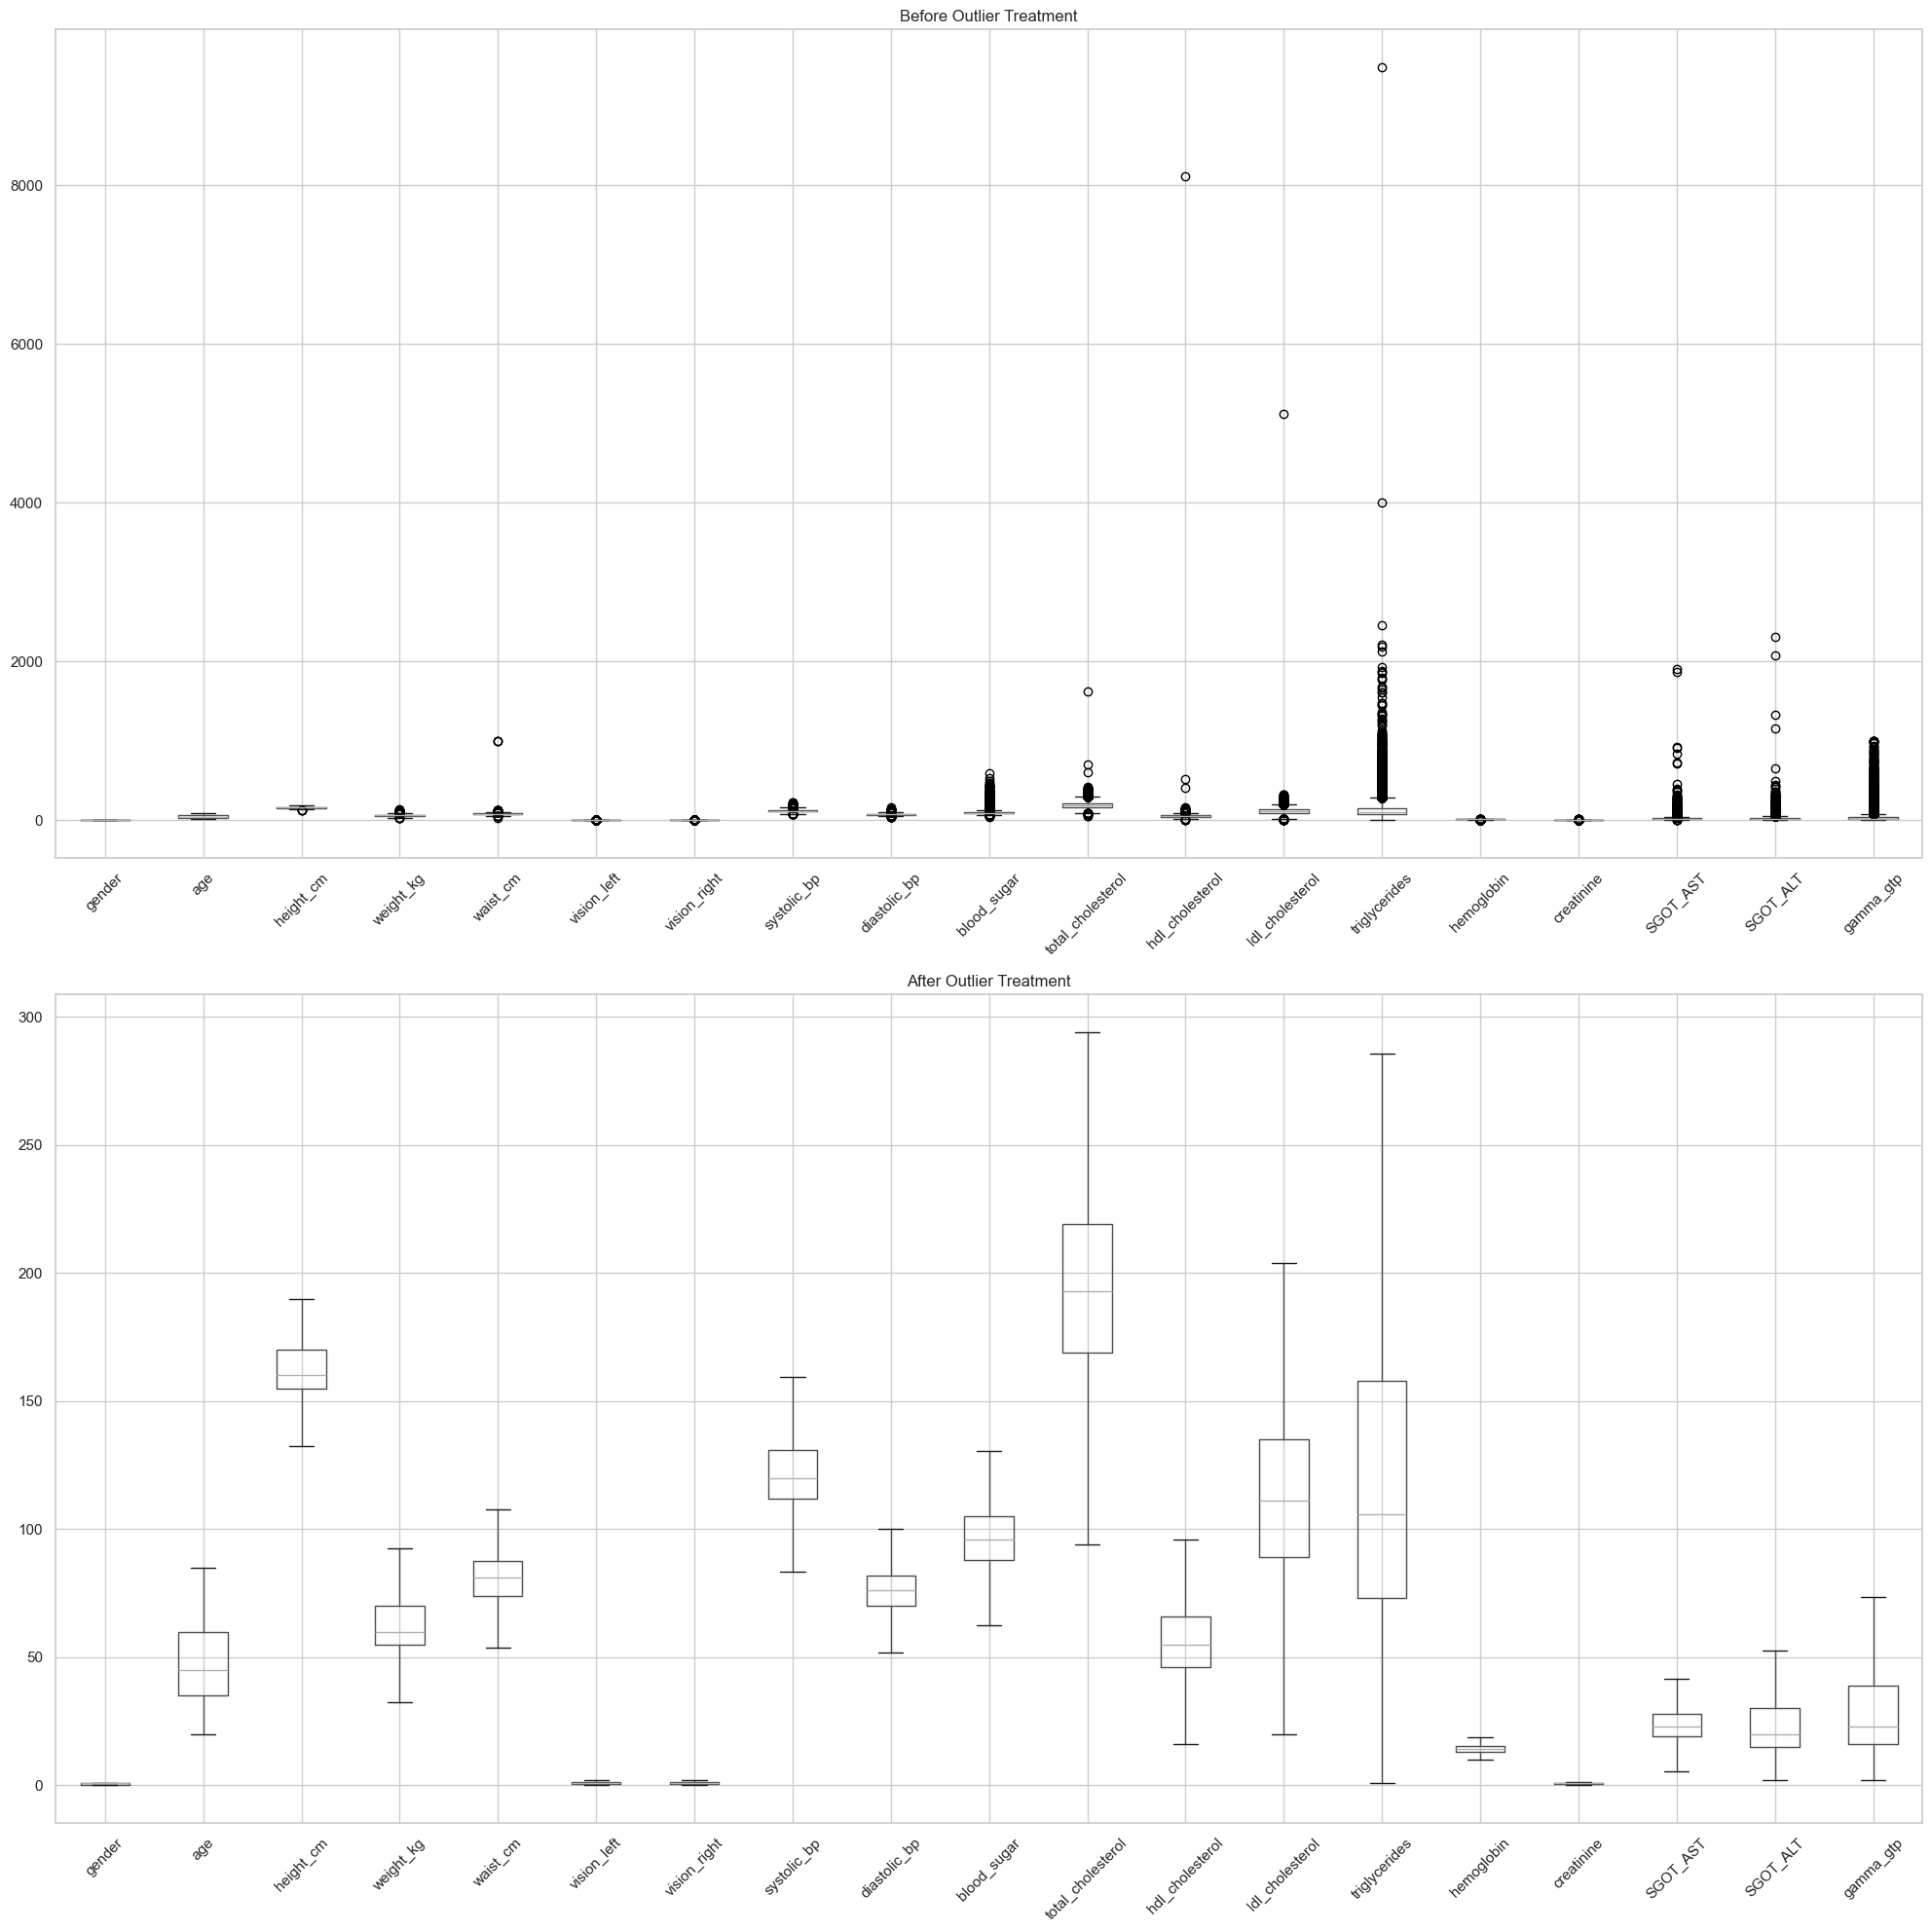

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

# Boxplot before
original_data[numerical_columns].boxplot(ax=axes[0])
axes[0].set_title("Before Outlier Treatment")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot after
dataset[numerical_columns].boxplot(ax=axes[1])
axes[1].set_title("After Outlier Treatment")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [66]:
print("After outlier treatment:")
print(dataset[numerical_columns].describe())

After outlier treatment:
             gender           age     height_cm     weight_kg      waist_cm  \
count  49999.000000  49999.000000  49999.000000  49999.000000  49999.000000   
mean       0.531591     47.582052    162.246145     63.117812     81.144435   
std        0.499006     14.163445      9.299699     12.126292      9.536119   
min        0.000000     20.000000    132.500000     32.500000     53.750000   
25%        0.000000     35.000000    155.000000     55.000000     74.000000   
50%        1.000000     45.000000    160.000000     60.000000     81.000000   
75%        1.000000     60.000000    170.000000     70.000000     87.500000   
max        1.000000     85.000000    190.000000     92.500000    107.750000   

        vision_left  vision_right   systolic_bp  diastolic_bp   blood_sugar  \
count  49999.000000  49999.000000  49999.000000  49999.000000  49999.000000   
mean       0.955601      0.953617    122.297646     75.962999     98.023540   
std        0.344517      0

### **Handling Imbalanced Dataset**

In [67]:
dataset['is_drinker'].value_counts() # Dataset already balanced

is_drinker
0    25126
1    24873
Name: count, dtype: int64

### **Train-Test Spilit**

In [68]:
X = dataset.drop('is_drinker', axis=1)
Y = dataset['is_drinker']

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [70]:
print(X.shape, X_train.shape, X_test.shape)

(49999, 21) (39999, 21) (10000, 21)


In [71]:
print(Y.shape, Y_train.shape, Y_test.shape)

(49999,) (39999,) (10000,)


### **Data Standardization**

In [72]:
numerical_columns = ['age', 'height_cm', 'weight_kg', 'waist_cm', 'vision_left',
       'vision_right', 'systolic_bp', 'diastolic_bp', 'blood_sugar',
       'total_cholesterol', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'hemoglobin', 'creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_gtp']

In [73]:
scalor = StandardScaler()

In [74]:
X_train[numerical_columns] = scalor.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scalor.fit_transform(X_test[numerical_columns])

### **Logestic Regression**

In [75]:
# Create Logistic Regression model with optimized parameters
lr = LogisticRegression()

In [76]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [77]:
lr_X_train_prediction = lr.predict(X_train)
lr_training_data_accuracy = accuracy_score(lr_X_train_prediction, Y_train)

In [78]:
lr_X_test_prediction = lr.predict(X_test)
lr_testing_data_accuracy = accuracy_score(lr_X_test_prediction, Y_test)

In [79]:
print('Accuracy on Training Data: ', lr_training_data_accuracy * 100)
print('Accuracy on Testing Data: ', lr_testing_data_accuracy * 100)

Accuracy on Training Data:  72.59431485787144
Accuracy on Testing Data:  72.89


## **Random Forest**

In [80]:
rf = RandomForestClassifier(
    n_estimators=100,          # You can keep this or reduce slightly
    max_depth=10,              # Add max depth to limit tree growth
    min_samples_split=10,      # Require more samples to split a node
    min_samples_leaf=4,        # Require more samples in leaf nodes
    max_features='sqrt',       # Consider fewer features per split
    random_state=42
)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [81]:
rf_X_train_prediction = rf.predict(X_train)
rf_training_data_accuracy = accuracy_score(rf_X_train_prediction, Y_train)

In [82]:
rf_prediction_X_test = rf.predict(X_test)
rf_testing_data_accuracy = accuracy_score(rf_prediction_X_test, Y_test)

In [83]:
print('Accuracy on Training Data: ', rf_training_data_accuracy * 100) 
print('Accuracy on Testing Data: ', rf_testing_data_accuracy * 100) 

Accuracy on Training Data:  77.56193904847622
Accuracy on Testing Data:  73.00999999999999


## **Support Vector Machines**

In [ ]:
svc = SVC()

In [85]:
svc.fit(X_train, Y_train)

NameError: name 'svc' is not defined

In [86]:
svc_X_train_prediction = svc.predict(X_train)
svc_training_data_accuracy = accuracy_score(svc_X_train_prediction, Y_train)

NameError: name 'svc' is not defined

In [87]:

svc_X_test_prediction = svc.predict(X_test)
svc_testing_data_accuracy = accuracy_score(svc_X_test_prediction, Y_test)

NameError: name 'svc' is not defined

In [88]:
print('Accuracy on Training Data: ', svc_training_data_accuracy * 100)
print('Accuracy on Testing Data: ', svc_testing_data_accuracy * 100)

NameError: name 'svc_training_data_accuracy' is not defined